# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [99]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#X, y = mnist['data'], mnist['target']

from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X, y = dataset['data'], dataset['target']



### Now take a look at the shapes of the X and y matricies 

In [100]:
print(dataset['data'].shape)
print(dataset['target'].shape)

(70000, 784)
(70000,)


In [101]:
dataset['data'].isna().sum()


pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [102]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [103]:
print(dataset['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [104]:
dataset['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [105]:
x=dataset['data'].loc[35999]


### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

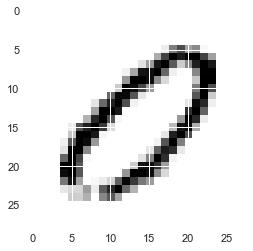

In [106]:
import matplotlib.pyplot 
fig, ax = plt.subplots()
ax.imshow(np.array(x).reshape(28, 28).T, cmap=matplotlib.cm.binary, interpolation='nearest') 

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [107]:
dataset['target'].loc[35999]

'0'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [108]:
x_train, x_test, y_train, y_test = dataset['data'][:60000], dataset['data'][60000:], dataset['target'][:60000], dataset['target'][60000:]

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [110]:
y_train5 = np.where(y_train == '5', 1,0) 
y_test5 = np.where(y_test == '5', 1,0) 

In [111]:
print(y_train5.shape)
print(y_test5.shape)

(60000,)
(10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train5)
y_pred = lr.predict(x_test)



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [114]:

### Print accuracy

acc_lr = lr.score(x_test, y_test5)
print('The accuracy of the Random Forest Classifier is:', acc_lr * 100, '%')


The accuracy of the Random Forest Classifier is: 97.78999999999999 %


### Does the classifier predict correctly the 36000th digit we picked before?

In [115]:
#Yes, the accuracy is very good

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [116]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [117]:
never_5_clf = Never5Classifier()
never_5_clf.fit(x_train, y_train5)
y_pred_never = never_5_clf.predict(x_test)
y_pred_never

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [118]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#for Logistic Regression
print("Logistic regression")
print(confusion_matrix(y_test5, y_pred ))
print(precision_score(y_test5, y_pred ))
print(recall_score(y_test5,y_pred ))
print(f1_score(y_test5, y_pred ))


# for never 5
print("Never 5")
print(confusion_matrix(y_test5, y_pred_never))
print(precision_score(y_test5, y_pred_never))
print(recall_score(y_test5, y_pred_never))
print(f1_score(y_test5, y_pred_never))

Logistic regression
[[9034   74]
 [ 147  745]]
0.9096459096459096
0.8352017937219731
0.8708357685563999
Never 5
[[9108    0]
 [ 892    0]]
0.0
0.0
0.0


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [119]:
LR is better, because he recognize 2 class

SyntaxError: invalid syntax (Temp/ipykernel_8256/1142454229.py, line 1)

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns 

fpr, tpr, thresholds = roc_curve(y_test5, y_pred)

sns.set_theme(style="darkgrid")

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()


from sklearn.metrics import plot_roc_curve
fpr, tpr, threshold = roc_curve(y_test5, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve


from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns 

fpr, tpr, thresholds = roc_curve(y_test5, y_pred_never)

sns.set_theme(style="darkgrid")

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Now find the roc_auc_score for each. 

In [ ]:
from sklearn.metrics import roc_auc_score

print("AUC Score for Logisitic Regression", roc_auc_score(y_test5,  y_pred))
print("AUC Score for Never 5 Classifier", roc_auc_scoree(y_test5, y_pred_never))

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
logistic regression is better - this other one, bad, 1 chance on 2